Multivariate data analysis. **Related to figures: 4 and S4.**

In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
library(ggplot2)

In [7]:
%%R
mitotic<-read.csv('../Data/meiotic_false.csv',stringsAsFactors=FALSE)
original<-read.csv('../Data/original.csv',stringsAsFactors=FALSE)

In [8]:
%%R
mitotic_for_MR<-mitotic
mitotic_for_MR$astere.to.pole_distance_AVG<-apply(mitotic_for_MR[,c(1,2)],1,mean,rm=TRUE)
mitotic_for_MR<-mitotic_for_MR[-c(1,2)]

In [9]:
%%R
mitotic_for_MR$inner_aster_diameter_AVG<-apply(mitotic_for_MR[,c(13,14)],1,mean,na.rm=TRUE)
to_drop<-c('inner_aster_diameter_1_um',"inner_aster_diameter_2_um")
mitotic_for_MR<-mitotic_for_MR[,!names(mitotic_for_MR) %in% to_drop]

In [10]:
%%R
mitotic_for_MR$polar_body_diameter_AVG<-apply(mitotic_for_MR[,c(27,28)],1,mean,na.rm=TRUE)
mitotic_for_MR<-mitotic_for_MR[-c(27,28)]

In [11]:
%%R
mitotic_for_MR$outer_aster_diameter_AVG<-apply(mitotic_for_MR[,c(23,24)],1,mean, na.rm=TRUE)
mitotic_for_MR<-mitotic_for_MR[-c(23,24)]

In [12]:
%%R
names(mitotic_for_MR)

 [1] "cell_diameter_um"                "centrosome"                     
 [3] "chromosomes"                     "classification"                 
 [5] "classification_CAT"              "cleavage_type"                  
 [7] "cleavage_type_CAT"               "day_old"                        
 [9] "distance_between_chromosomes_um" "fixation"                       
[11] "fixation_CAT"                    "genome"                         
[13] "metaphase_plate_aspect_ratio_um" "metaphase_plate_lengt_h_um"     
[15] "metaphase_plate_width_um"        "microscope"                     
[17] "microscope_CAT"                  "num_of_cells"                   
[19] "num_of_cells_CAT"                "num_of_cells_NUM"               
[21] "organism"                        "organism_CAT"                   
[23] "phylum"                          "phylum_CAT"                     
[25] "spindle_aspect_ratio_asters_um"  "spindle_aspect_ratio_poles_um"  
[27] "spindle_length__asters_um"       "spindle_len

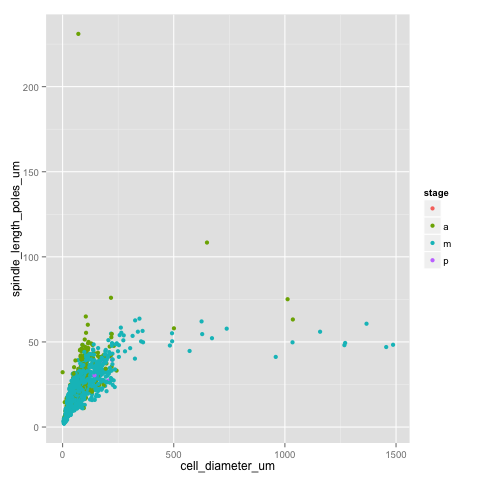

In [13]:
%%R
ggplot(data=mitotic)+geom_point(aes(y=spindle_length_poles_um,x=cell_diameter_um,colour=stage))


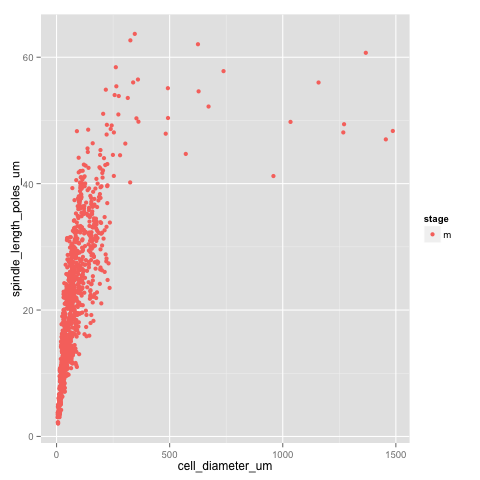

In [15]:
%%R
mitotic_for_MR_met<-mitotic_for_MR[(mitotic_for_MR$stage == 'm' | mitotic_for_MR$stage=='mI' | mitotic_for_MR$stage=='mII'),]
ggplot(data=mitotic_for_MR_met)+geom_point(aes(y=spindle_length_poles_um,x=cell_diameter_um,colour=stage))


In [16]:
%%R
char_cols<-vector()
for (i in 1:length(names(mitotic_for_MR_met))){
  if(class(mitotic_for_MR_met[,i])=='character'){
    char_cols[i]<-names(mitotic_for_MR_met)[i]
    #print(col)
    #print(class(mitotic[,col]))
  }
}
char_cols<-char_cols[!is.na(char_cols)]
mitotic_for_MR_met_num<-mitotic_for_MR_met[,!names(mitotic_for_MR_met) %in% char_cols]

In [17]:
%%R
CAT_cols<-names(mitotic_for_MR_met_num[,grep('_CAT',names(mitotic_for_MR_met_num),value = TRUE)])

for(i in 1:length(CAT_cols)){
  mitotic_for_MR_met_num[,CAT_cols[i]]<-as.integer(mitotic_for_MR_met_num[,CAT_cols[i]])
}


In [18]:
%%R
for(i in 1:length(CAT_cols)){
  print(class(mitotic_for_MR_met_num[,CAT_cols[i]]))
}

[1] "integer"
[1] "integer"
[1] "integer"
[1] "integer"
[1] "integer"
[1] "integer"
[1] "integer"
[1] "integer"


In [21]:
%%R 
integer_cols<-vector() 
for (i in 1:length(names(mitotic_for_MR_met_num))){
  if(class(mitotic_for_MR_met_num[,i])=='integer'){
    integer_cols[i]<-names(mitotic_for_MR_met_num)[i]
  }
}

In [22]:
%%R
integer_cols<-integer_cols[!is.na(integer_cols)]

In [23]:
%%R
integer_cols<-c(integer_cols,'chromosomes',"num_of_cells_NUM")

In [24]:
%%R
mitotic_for_MR_met_num<-mitotic_for_MR_met_num[!names(mitotic_for_MR_met_num) %in% integer_cols]

In [25]:
%%R
for (col in names(mitotic_for_MR_met_num)){
  print(class(mitotic_for_MR_met_num[,col]))
}

[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"


Multiple regression.

In [26]:
%%R
dim(mitotic_for_MR_met_num)

[1] 1106   15


stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.

	Shapiro-Wilk normality test

data:  mitotic_for_MR_met_num$spindle_length_poles_um
W = 0.9604, p-value < 2.2e-16



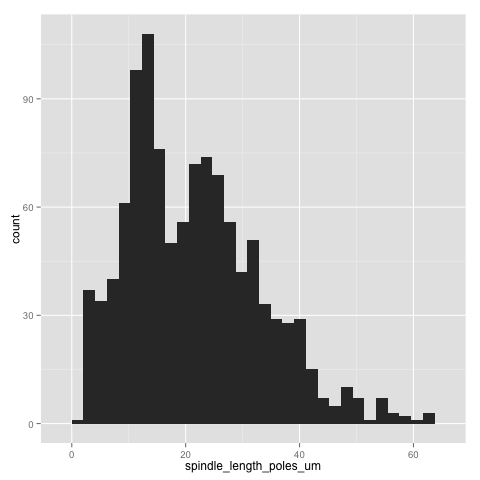

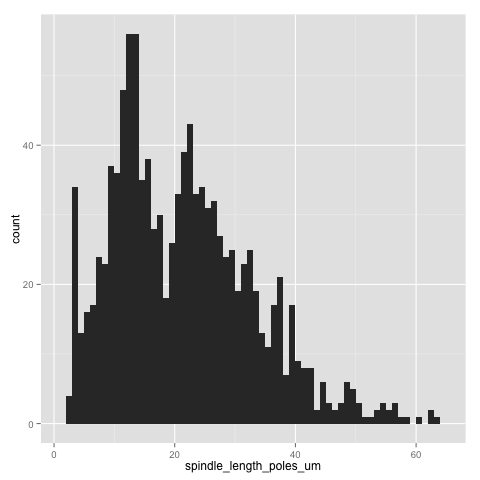

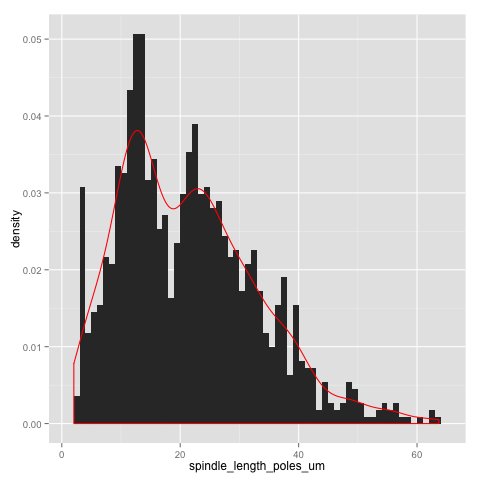

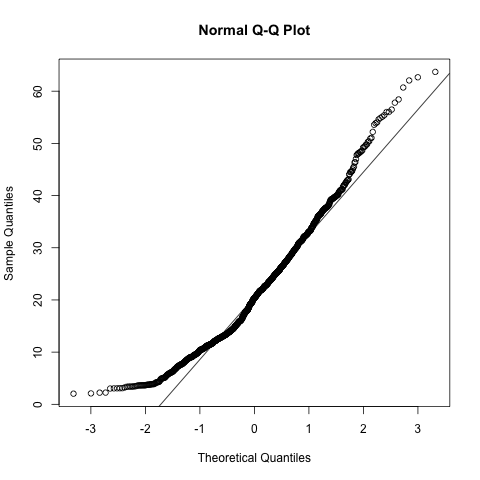

In [29]:
%%R
print(ggplot(data=mitotic_for_MR_met_num)+geom_histogram(aes(x=spindle_length_poles_um)))
print(ggplot(data=mitotic_for_MR_met_num)+geom_histogram(aes(x=spindle_length_poles_um),binwidth=1))
print(ggplot(data=mitotic_for_MR_met_num)+geom_histogram(aes(x=spindle_length_poles_um,y=..density..),binwidth=1)+geom_density(aes(spindle_length_poles_um),colour='red'))
print(shapiro.test(mitotic_for_MR_met_num$spindle_length_poles_um) )
qqnorm(mitotic_for_MR_met_num$spindle_length_poles_um)
qqline(mitotic_for_MR_met_num$spindle_length_poles_um)

In [30]:
%%R
skew<-function(x){
  m3<-sum((x-mean(x,na.rm=TRUE))^3,na.rm=TRUE)/length(x)
  s3<-sqrt(var(x,na.rm=TRUE))^3
  skew<-m3/s3
  se_gamma<-sqrt(6/length(x))  
  t=skew/se_gamma
  #pt is cumulative distribution function (tests equal or less than value given)
  prob=1-pt(t,length(x)-2)
  return(list(skew=skew,se_gamma=se_gamma,prob=prob))
}
skew(mitotic_for_MR_met_num$spindle_length_poles_um)

$skew
[1] 0.7101401

$se_gamma
[1] 0.07365429

$prob
[1] 0



In [31]:
%%R
kurtosis<-function(x){
  m4<-sum((x-mean(x,na.rm=TRUE))^4,na.rm=TRUE)/length(x)
  s4<-var(x,na.rm=TRUE)^2
  kurtosis=m4/s4-3
  se_gamma<-sqrt(24/length(x))
  t=kurtosis/se_gamma
  prob=1-pt(t,length(x)-2)
  return(list(kurtosis=kurtosis,se_gamma=se_gamma,prob=prob))
}

kurtosis(mitotic_for_MR_met_num$spindle_length_poles_um)

$kurtosis
[1] 0.2467352

$se_gamma
[1] 0.1473086

$prob
[1] 0.04711315



stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.

	Shapiro-Wilk normality test

data:  log(mitotic_for_MR_met_num$spindle_length_poles_um)
W = 0.9637, p-value = 5.589e-16



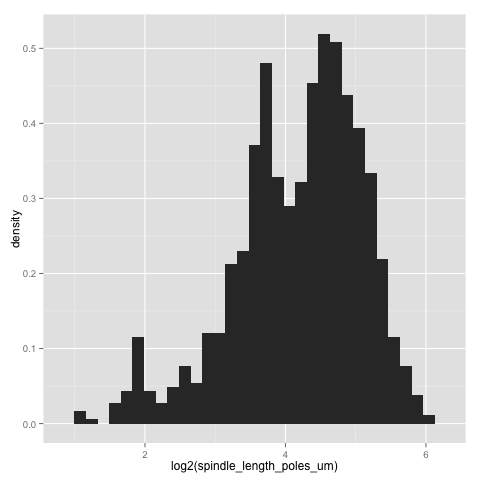

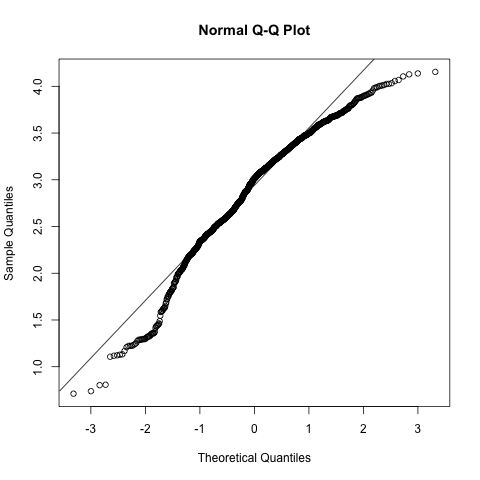

In [33]:
%%R
print(ggplot(data=mitotic_for_MR_met_num)+geom_histogram(aes(x=log2(spindle_length_poles_um),y=..density..)))
print(shapiro.test(log(mitotic_for_MR_met_num$spindle_length_poles_um)))
qqnorm(log(mitotic_for_MR_met_num$spindle_length_poles_um))
qqline(log(mitotic_for_MR_met_num$spindle_length_poles_um))

stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.


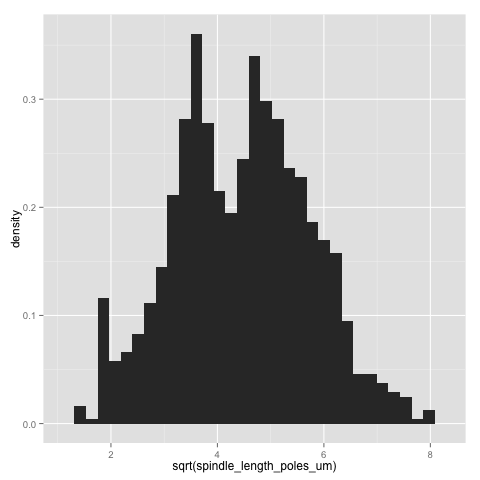

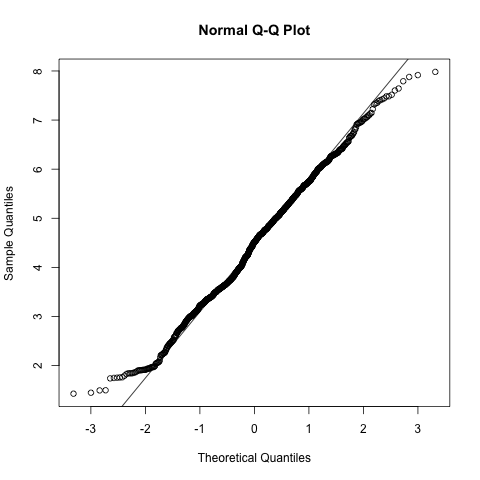

In [34]:
%%R
print(ggplot(data=mitotic_for_MR_met_num)+geom_histogram(aes(x=sqrt(spindle_length_poles_um),y=..density..)))
qqnorm(sqrt(mitotic_for_MR_met_num$spindle_length_poles_um))
qqline(sqrt(mitotic_for_MR_met_num$spindle_length_poles_um))



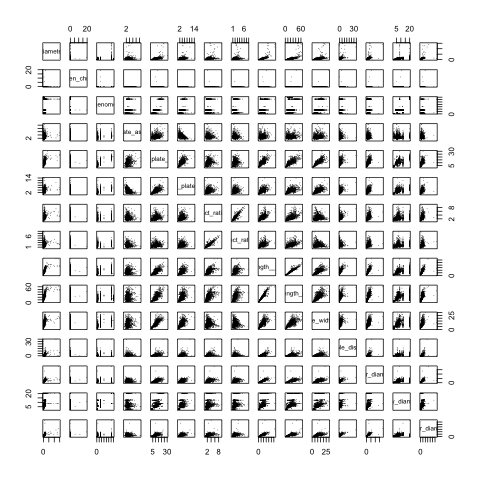

In [35]:
%%R
pairs(mitotic_for_MR_met_num,pch=16,cex=0.2)

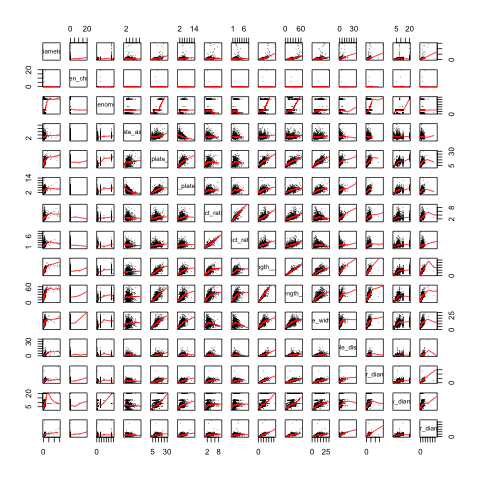

In [36]:
%%R
pairs(mitotic_for_MR_met_num,pch=16,cex=0.2,panel=panel.smooth)

In [37]:
%%R
library(mgcv)

Loading required package: nlme
This is mgcv 1.8-6. For overview type 'help("mgcv-package")'.


In [38]:
%%R
model.1<-gam(mitotic_for_MR_met_num$spindle_length_poles_um ~ s(mitotic_for_MR_met_num[,1]))

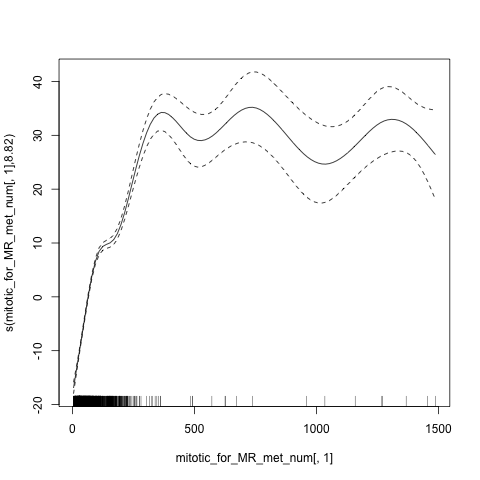

In [39]:
%%R
plot(model.1)

In [41]:
%%R
curvature<-function(data_frame,resp_var_name,expl_var_name){
  model<-gam(unlist(data_frame[resp_var_name]) ~ s(unlist(data_frame[expl_var_name])))
  return(model)
}

In [42]:
%%R
listing_curvatures<-function(data_frame){
  list_of_gams<-vector('list',length(names(data_frame)))
  for(i in 1:length(names(data_frame))){
    print(names(data_frame)[i])
    
    list_of_gams[[i]]<-try(curvature(data_frame,"spindle_length_poles_um",names(data_frame)[i]))
  }
  list_of_gams<-setNames(list_of_gams,names(data_frame))  
  return(list_of_gams)
}
list_of_gams<-listing_curvatures(mitotic_for_MR_met_num)

[1] "cell_diameter_um"
[1] "distance_between_chromosomes_um"
Error in smooth.construct.tp.smooth.spec(object, dk$data, dk$knots) : 
  A term has fewer unique covariate combinations than specified maximum degrees of freedom
[1] "genome"
[1] "metaphase_plate_aspect_ratio_um"
[1] "metaphase_plate_lengt_h_um"
[1] "metaphase_plate_width_um"
[1] "spindle_aspect_ratio_asters_um"
[1] "spindle_aspect_ratio_poles_um"
[1] "spindle_length__asters_um"
[1] "spindle_length_poles_um"
[1] "spindle_width_um"
[1] "astere.to.pole_distance_AVG"
[1] "inner_aster_diameter_AVG"
[1] "polar_body_diameter_AVG"
[1] "outer_aster_diameter_AVG"


In [ ]:
%%R
gam_plotter<-function(list_of_models){
  for(i in 1:length(list_of_models)){
    pdf(paste(i,'_','gam_',names(list_of_models)[i],'_mitotic.pdf',sep=""))
    try(plot(list_of_models[[i]]),silent=TRUE)
    dev.off()
  }
}


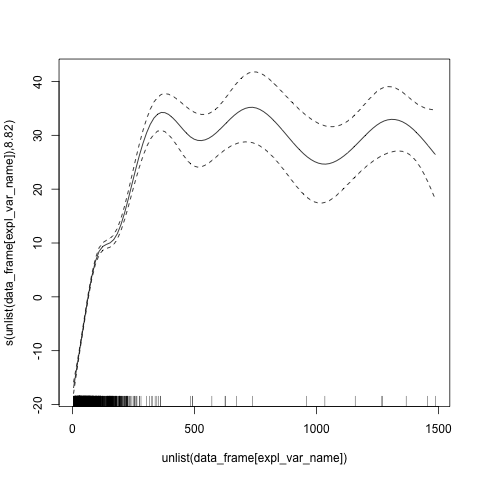

In [44]:
%%R
plot(list_of_gams[[1]])

Tree models to pick up the relevant variables.

In [45]:
%%R
library(tree)

In [46]:
%%R
names(mitotic_for_MR_met_num[,c(1:8,10:15)]) 

 [1] "cell_diameter_um"                "distance_between_chromosomes_um"
 [3] "genome"                          "metaphase_plate_aspect_ratio_um"
 [5] "metaphase_plate_lengt_h_um"      "metaphase_plate_width_um"       
 [7] "spindle_aspect_ratio_asters_um"  "spindle_aspect_ratio_poles_um"  
 [9] "spindle_length_poles_um"         "spindle_width_um"               
[11] "astere.to.pole_distance_AVG"     "inner_aster_diameter_AVG"       
[13] "polar_body_diameter_AVG"         "outer_aster_diameter_AVG"       


In [48]:
%%R
model.2<-tree(mitotic_for_MR_met_num[,c(1:8,10:15)]$spindle_length_poles_um ~ . ,data=mitotic_for_MR_met_num[,c(1:8,10:15)])

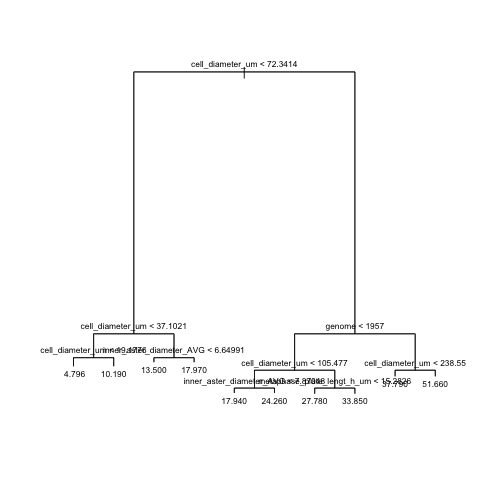

In [49]:
%%R
plot(model.2)
text(model.2,cex=0.7)

In [50]:
%%R
model.2

node), split, n, deviance, yval
      * denotes terminal node

 1) root 561 57710.00 17.630  
   2) cell_diameter_um < 72.3414 347  6713.00 11.300  
     4) cell_diameter_um < 37.1021 194  1962.00  8.550  
       8) cell_diameter_um < 19.1776 59   193.30  4.796 *
       9) cell_diameter_um > 19.1776 135   573.80 10.190 *
     5) cell_diameter_um > 37.1021 153  1426.00 14.780  
      10) inner_aster_diameter_AVG < 6.64991 109   306.10 13.500 *
      11) inner_aster_diameter_AVG > 6.64991 44   491.60 17.970 *
   3) cell_diameter_um > 72.3414 214 14530.00 27.900  
     6) genome < 1957 196  8355.00 26.420  
      12) cell_diameter_um < 105.477 70  1825.00 21.640  
        24) inner_aster_diameter_AVG < 7.87048 29   448.40 17.940 *
        25) inner_aster_diameter_AVG > 7.87048 41   697.00 24.260 *
      13) cell_diameter_um > 105.477 126  4044.00 29.080  
        26) metaphase_plate_lengt_h_um < 15.2826 99  1973.00 27.780 *
        27) metaphase_plate_lengt_h_um > 15.2826 27  1288.00 33.8

In [51]:
%%R
y=mitotic_for_MR_met_num[,c(1:8,10:15)]$spindle_length_poles_um
SSY=sum(sapply(y,function(x)(x-mean(y,na.rm=TRUE))^2),na.rm=TRUE)
SSY.model.2<-sum(sapply(model.2$y,function(x)(x-mean(model.2$y,na.rm=TRUE))^2),na.rm=TRUE)
summary(model.2)


Regression tree:
tree(formula = mitotic_for_MR_met_num[, c(1:8, 10:15)]$spindle_length_poles_um ~ 
    ., data = mitotic_for_MR_met_num[, c(1:8, 10:15)])
Variables actually used in tree construction:
[1] "cell_diameter_um"           "inner_aster_diameter_AVG"  
[3] "genome"                     "metaphase_plate_lengt_h_um"
Number of terminal nodes:  10 
Residual mean deviance:  11.29 = 6219 / 551 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-13.9500  -1.7820  -0.1094   0.0000   1.7590  21.0200 


In [52]:
%%R
residual_dev=sum(model.2$frame[model.2$frame$var=='<leaf>',]$dev)
frac_dev_expl=1-residual_dev/model.2$frame$dev[1]

In [53]:
%%R
get_tree_idx_of_var_x<-function(tree_model,var_name){
  result<-list(idx=row.names(tree_model$frame[tree_model$frame$var==var_name,]),entry_dev=tree_model$frame[tree_model$frame$var==var_name,]$dev)
  return(result)
}


In [54]:
%%R
get_output_deviance<-function(tree_model,var_name){
  entry_indices=get_tree_idx_of_var_x(tree_model,var_name)$idx
  exit_indices<-vector('list',length(entry_indices))
  for(i in 1:length(entry_indices)){
      exit_indices[[i]]<-c(as.character(as.numeric(entry_indices[i])*2),as.character(as.numeric(entry_indices[i])*2+1))
  }
  output_dev<-vector()
  for(i in 1:length(exit_indices)){
    output_dev[i]<-(sum(tree_model$frame[row.names(tree_model$frame) %in% exit_indices[[i]],]$dev))
  }
  return(sum(output_dev))
}

In [55]:
%%R
print(get_tree_idx_of_var_x(model.2,'cell_diameter_um')$entry_dev[1])
print(get_output_deviance(model.2,'cell_diameter_um'))
frac_of_dev_cell_diam=get_output_deviance(model.2,'cell_diameter_um')/get_tree_idx_of_var_x(model.2,'cell_diameter_um')$entry_dev[1]

attr(model.2$terms,'term.labels')



[1] 57705.85
[1] 31508.85
 [1] "cell_diameter_um"                "distance_between_chromosomes_um"
 [3] "genome"                          "metaphase_plate_aspect_ratio_um"
 [5] "metaphase_plate_lengt_h_um"      "metaphase_plate_width_um"       
 [7] "spindle_aspect_ratio_asters_um"  "spindle_aspect_ratio_poles_um"  
 [9] "spindle_width_um"                "astere.to.pole_distance_AVG"    
[11] "inner_aster_diameter_AVG"        "polar_body_diameter_AVG"        
[13] "outer_aster_diameter_AVG"       


In [56]:
%%R
most_rel_terms<-function(list_of_terms){
  for(i in 1:length(as.character(list_of_terms))){
    print(list_of_terms[i])
  }
  #return()
}
class(as.character(summary(model.2)$used))
most_rel_terms(as.character(summary(model.2)$used))



[1] "cell_diameter_um"
[1] "inner_aster_diameter_AVG"
[1] "genome"
[1] "metaphase_plate_lengt_h_um"


Maximal model

In [58]:
%%R
names(mitotic_for_MR_met_num)
continuous.vars<-names(mitotic_for_MR_met_num)

cd2<-(mitotic_for_MR_met_num$cell_diameter_um)^2
g2<-(mitotic_for_MR_met_num$genome)^2
iad2<-(mitotic_for_MR_met_num$inner_aster_diameter_AVG)^2
cd_g<-mitotic_for_MR_met_num$cell_diameter_um*mitotic_for_MR_met_num$genome
cd_iad<-mitotic_for_MR_met_num$cell_diameter_um*mitotic_for_MR_met_num$inner_aster_diameter_AVG
cd_mplh<-mitotic_for_MR_met_num$cell_diameter_um*mitotic_for_MR_met_num$metaphase_plate_lengt_h_um
cd_g_iad<-mitotic_for_MR_met_num$cell_diameter_um*mitotic_for_MR_met_num$genome*mitotic_for_MR_met_num$inner_aster_diameter_AVG
cd_g_mplh<-mitotic_for_MR_met_num$cell_diameter_um*mitotic_for_MR_met_num$genome*mitotic_for_MR_met_num$metaphase_plate_lengt_h_um

model.3<-lm(mitotic_for_MR_met_num$spindle_length_poles_um~mitotic_for_MR_met_num$cell_diameter_um+mitotic_for_MR_met_num$inner_aster_diameter_AVG+mitotic_for_MR_met_num$genome+mitotic_for_MR_met_num$metaphase_plate_lengt_h_um+cd2+g2+iad2+cd_g+cd_g_iad+cd_mplh+cd_g_iad+cd_g_mplh)
summary(model.3)


Call:
lm(formula = mitotic_for_MR_met_num$spindle_length_poles_um ~ 
    mitotic_for_MR_met_num$cell_diameter_um + mitotic_for_MR_met_num$inner_aster_diameter_AVG + 
        mitotic_for_MR_met_num$genome + mitotic_for_MR_met_num$metaphase_plate_lengt_h_um + 
        cd2 + g2 + iad2 + cd_g + cd_g_iad + cd_mplh + cd_g_iad + 
        cd_g_mplh)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.2992  -1.9472  -0.3609   1.8789  15.3348 

Coefficients:
                                                    Estimate Std. Error t value
(Intercept)                                        1.405e-01  6.897e-01   0.204
mitotic_for_MR_met_num$cell_diameter_um            9.506e-02  1.219e-02   7.800
mitotic_for_MR_met_num$inner_aster_diameter_AVG    9.597e-01  8.543e-02  11.233
mitotic_for_MR_met_num$genome                      1.152e-03  8.499e-04   1.355
mitotic_for_MR_met_num$metaphase_plate_lengt_h_um  5.023e-01  9.600e-02   5.232
cd2                                               -5.698

In [59]:
%%R
model.3a<-update(model.3,~.-cd_g_mplh)
summary(model.3a)


Call:
lm(formula = mitotic_for_MR_met_num$spindle_length_poles_um ~ 
    mitotic_for_MR_met_num$cell_diameter_um + mitotic_for_MR_met_num$inner_aster_diameter_AVG + 
        mitotic_for_MR_met_num$genome + mitotic_for_MR_met_num$metaphase_plate_lengt_h_um + 
        cd2 + g2 + iad2 + cd_g + cd_g_iad + cd_mplh)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.2519  -1.9592  -0.3963   1.9570  15.1694 

Coefficients:
                                                    Estimate Std. Error t value
(Intercept)                                        3.538e-01  5.380e-01   0.658
mitotic_for_MR_met_num$cell_diameter_um            8.995e-02  6.497e-03  13.845
mitotic_for_MR_met_num$inner_aster_diameter_AVG    9.622e-01  8.524e-02  11.288
mitotic_for_MR_met_num$genome                      1.135e-03  8.488e-04   1.337
mitotic_for_MR_met_num$metaphase_plate_lengt_h_um  4.790e-01  8.364e-02   5.727
cd2                                               -5.681e-05  3.981e-06 -14.268
g2      

In [60]:
%%R
model.3b<-update(model.3a,~.-cd_mplh)
summary(model.3b)


Call:
lm(formula = mitotic_for_MR_met_num$spindle_length_poles_um ~ 
    mitotic_for_MR_met_num$cell_diameter_um + mitotic_for_MR_met_num$inner_aster_diameter_AVG + 
        mitotic_for_MR_met_num$genome + mitotic_for_MR_met_num$metaphase_plate_lengt_h_um + 
        cd2 + g2 + iad2 + cd_g + cd_g_iad)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.2496  -1.9764  -0.3939   1.9571  15.1935 

Coefficients:
                                                    Estimate Std. Error t value
(Intercept)                                        3.143e-01  4.790e-01   0.656
mitotic_for_MR_met_num$cell_diameter_um            9.031e-02  6.108e-03  14.785
mitotic_for_MR_met_num$inner_aster_diameter_AVG    9.610e-01  8.487e-02  11.323
mitotic_for_MR_met_num$genome                      1.094e-03  8.088e-04   1.353
mitotic_for_MR_met_num$metaphase_plate_lengt_h_um  4.868e-01  6.852e-02   7.104
cd2                                               -5.663e-05  3.819e-06 -14.828
g2                

In [61]:
%%R
model.3c<-update(model.3b,~.-cd_g_iad)
summary(model.3c)


Call:
lm(formula = mitotic_for_MR_met_num$spindle_length_poles_um ~ 
    mitotic_for_MR_met_num$cell_diameter_um + mitotic_for_MR_met_num$inner_aster_diameter_AVG + 
        mitotic_for_MR_met_num$genome + mitotic_for_MR_met_num$metaphase_plate_lengt_h_um + 
        cd2 + g2 + iad2 + cd_g)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.9486  -1.9441  -0.4179   1.9513  15.1478 

Coefficients:
                                                    Estimate Std. Error t value
(Intercept)                                        3.181e-01  4.790e-01   0.664
mitotic_for_MR_met_num$cell_diameter_um            9.173e-02  5.969e-03  15.368
mitotic_for_MR_met_num$inner_aster_diameter_AVG    9.393e-01  8.252e-02  11.383
mitotic_for_MR_met_num$genome                      1.101e-03  8.089e-04   1.361
mitotic_for_MR_met_num$metaphase_plate_lengt_h_um  4.928e-01  6.831e-02   7.214
cd2                                               -5.714e-05  3.790e-06 -15.076
g2                           

In [62]:
%%R
model.3d<-update(model.3c,~.-cd_g)
summary(model.3d)


Call:
lm(formula = mitotic_for_MR_met_num$spindle_length_poles_um ~ 
    mitotic_for_MR_met_num$cell_diameter_um + mitotic_for_MR_met_num$inner_aster_diameter_AVG + 
        mitotic_for_MR_met_num$genome + mitotic_for_MR_met_num$metaphase_plate_lengt_h_um + 
        cd2 + g2 + iad2)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.877  -1.933  -0.406   1.939  15.134 

Coefficients:
                                                    Estimate Std. Error t value
(Intercept)                                        3.155e-01  4.785e-01   0.659
mitotic_for_MR_met_num$cell_diameter_um            9.264e-02  4.066e-03  22.787
mitotic_for_MR_met_num$inner_aster_diameter_AVG    9.326e-01  7.592e-02  12.284
mitotic_for_MR_met_num$genome                      1.122e-03  8.021e-04   1.399
mitotic_for_MR_met_num$metaphase_plate_lengt_h_um  4.898e-01  6.672e-02   7.341
cd2                                               -5.663e-05  2.878e-06 -19.677
g2                                            

In [64]:
%%R
model.3e<-update(model.3d,~.-cd2)
summary(model.3e)


Call:
lm(formula = mitotic_for_MR_met_num$spindle_length_poles_um ~ 
    mitotic_for_MR_met_num$cell_diameter_um + mitotic_for_MR_met_num$inner_aster_diameter_AVG + 
        mitotic_for_MR_met_num$genome + mitotic_for_MR_met_num$metaphase_plate_lengt_h_um + 
        g2 + iad2)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.7059  -2.5513  -0.6483   2.0210  21.0544 

Coefficients:
                                                    Estimate Std. Error t value
(Intercept)                                       -6.658e-01  5.975e-01  -1.114
mitotic_for_MR_met_num$cell_diameter_um            1.759e-02  1.767e-03   9.953
mitotic_for_MR_met_num$inner_aster_diameter_AVG    1.626e+00  8.443e-02  19.260
mitotic_for_MR_met_num$genome                      3.410e-04  1.006e-03   0.339
mitotic_for_MR_met_num$metaphase_plate_lengt_h_um  7.603e-01  8.197e-02   9.276
g2                                                 6.681e-07  2.671e-07   2.501
iad2                                      

In [65]:
%%R
model.3f<-update(model.3e,~.-mitotic_for_MR_met_num$genome)
summary(model.3f)


Call:
lm(formula = mitotic_for_MR_met_num$spindle_length_poles_um ~ 
    mitotic_for_MR_met_num$cell_diameter_um + mitotic_for_MR_met_num$inner_aster_diameter_AVG + 
        mitotic_for_MR_met_num$metaphase_plate_lengt_h_um + g2 + 
        iad2)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.7105  -2.5514  -0.6596   1.9991  21.1611 

Coefficients:
                                                    Estimate Std. Error t value
(Intercept)                                       -6.174e-01  5.799e-01  -1.065
mitotic_for_MR_met_num$cell_diameter_um            1.753e-02  1.757e-03   9.976
mitotic_for_MR_met_num$inner_aster_diameter_AVG    1.621e+00  8.302e-02  19.525
mitotic_for_MR_met_num$metaphase_plate_lengt_h_um  7.756e-01  6.841e-02  11.338
g2                                                 7.532e-07  9.152e-08   8.230
iad2                                              -2.921e-02  2.532e-03 -11.538
                                                  Pr(>|t|)    
(Intercept)